<a href="https://colab.research.google.com/github/Pager07/FinalYearProject/blob/master/ImageRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project LadderBoard

- Downloading the data
- Importing (DONE)
  - Fastai (DONE)
  - google drive (DONE) 
- Understanding the data
  - Loading the data
      - set up (DONE)
        - root_dir (PATH TO Main Project Folder) (DONE)
        - base_dir (Path to data folder) (DONE)
    - Loading Images (DONE)
    - Loading Points (DONE)
- Creating Dataobject (DONE) 
- Creating Databunch (DONE)
    - Look at the batches
        - Clean Up data in Drive (DONE)
        - Look up for speific images in databunch?(DONT KNOW)
            - Try fitting the model anyway, 
            - if it does really bad, use open cv to fix it
            - 
- Creating  Learner 
  - Find Best LR
- Fit 

# Importing FastAi Library

In [0]:
#Reload an IPython extension by its module name.
%reload_ext autoreload
#2 is the code to reload ALL modules before running any code cell
%autoreload 2 
%matplotlib inline

from fastai.vision import *

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount = True);

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Understanding the data

In [0]:
root_dir = '/content/gdrive/My Drive/My Notes/3rd year/Individual Projects' 
base_dir = root_dir + '/Data'
path = Path(base_dir)


In [0]:
img = open_image(path/'train'/'46,97.png')

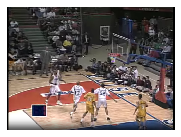

In [0]:
img.show()

#Creating DataObject, DataLoader and DataBunch

In [0]:
transforms = get_transforms(do_flip=True , max_rotate=None , max_zoom=0, max_warp=0. )

In [0]:
def get_points(filePath):
  coordList = str(filePath).split('/')[-1].split('.')[0].split(',')
  coordList = list(map(int, coordList));coordList
  coordTensor = tensor(coordList).flip(0);
  return coordTensor

In [0]:
#TEST get_points
#From sc: This is what is being passed to label_from_func
#imageList.items[0]

In [0]:
#TEST get_points
# coordList = str(imageList.items[0]).split('/')[-1].split('.')[0].split(',')
# coordList = list(map(int, coordList));coordList
# coordTensor = tensor(coordList).flip(0);coordTensor

In [7]:
#This is the dataobject
imageList  = PointsItemList.from_folder(path)
imageList = imageList.split_by_folder(train='train' , valid='valid').label_from_func(get_points);imageList


LabelLists;

Train: LabelList (649 items)
x: PointsItemList
Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490)
y: PointsLabelList
ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490)
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data;

Valid: LabelList (412 items)
x: PointsItemList
Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490)
y: PointsLabelList
ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490)
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data;

Test: None

In [0]:
data = imageList.transform(tfms=transforms , tfm_y = True , size=(120,160))

In [0]:
data = data.databunch(bs = 64).normalize(imagenet_stats);

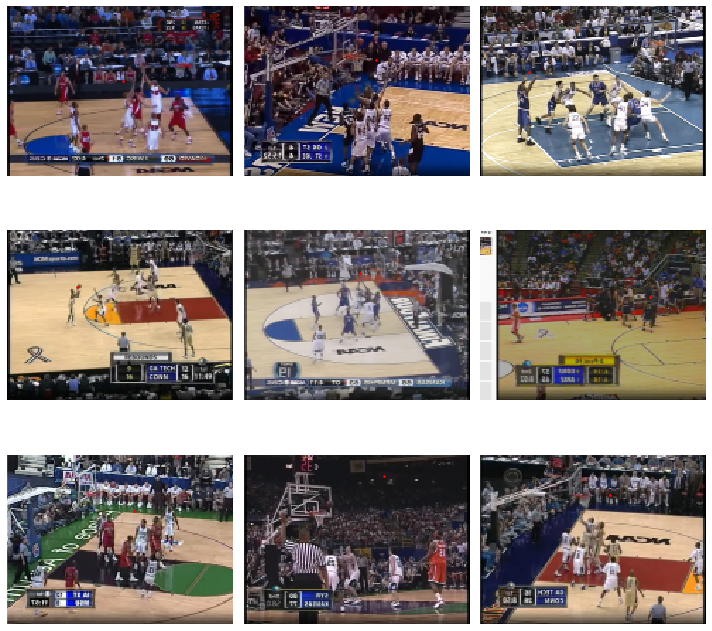

In [11]:
data.show_batch(rows=3, figsize=(10,10))

#Training

In [9]:
learn = cnn_learner(data , models.resnet34);

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 82.9MB/s]


In [0]:
learn.loss_func = MSELossFlat(); 

The validation loss is NaN because we don’t track its value. Here we want to find an optimal lr value for the training of our model and thus we check its training loss.


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,4.129411,#na#,00:09
1,4.175422,#na#,00:09
2,4.007416,#na#,00:09
3,3.927977,#na#,00:09
4,3.868926,#na#,00:09
5,3.631653,#na#,00:09
6,3.382029,#na#,00:09
7,3.650255,#na#,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


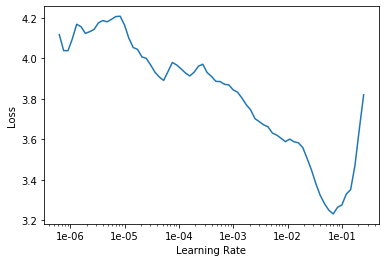

In [0]:
learn.recorder.plot()

In [0]:
lr = 1e-02

In [0]:
learn.fit_one_cycle(10,slice(lr))

epoch,train_loss,valid_loss,time
0,3.558550,1.680393,00:14
1,3.523166,1.689352,00:14
2,2.957210,0.675137,00:14
3,2.212074,0.262078,00:14
4,1.680169,0.143632,00:14
5,1.297249,0.104415,00:14
6,1.020235,0.086291,00:14
7,0.818643,0.077835,00:14
8,0.667103,0.075107,00:14
9,0.550742,0.074260,00:14


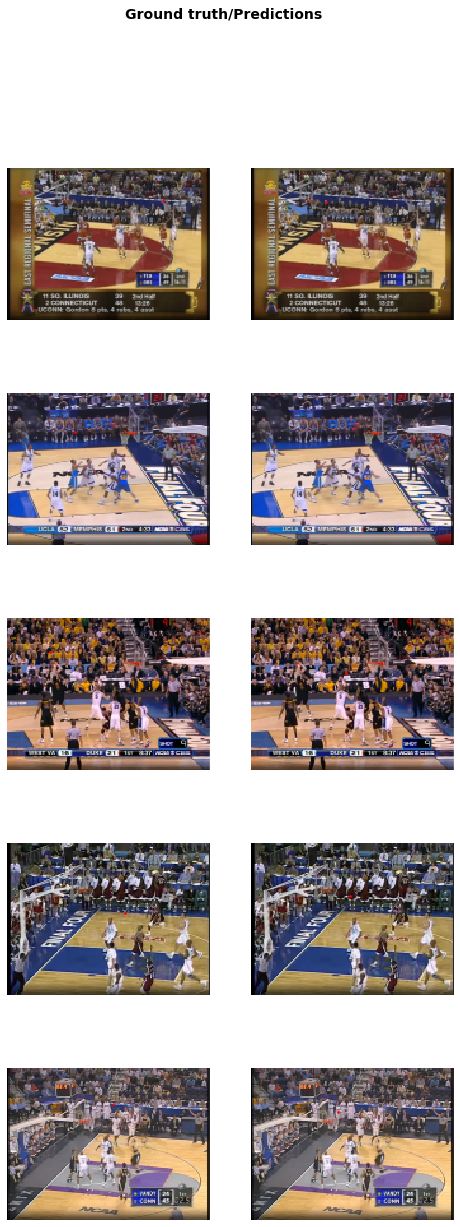

In [0]:
learn.show_results()

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,0.115326,#na#,00:09
1,0.113233,#na#,00:09
2,0.109213,#na#,00:09
3,0.105727,#na#,00:09
4,0.100627,#na#,00:09
5,0.099010,#na#,00:09
6,0.305551,#na#,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


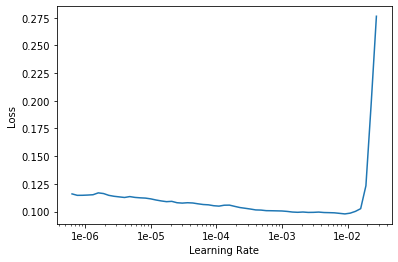

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr =slice(1e-02 ,1e-03))

epoch,train_loss,valid_loss,time
0,0.116848,0.179327,00:15
1,0.112513,2.138433,00:15
2,0.107326,91.030632,00:15
3,0.098654,0.118661,00:15
4,0.091694,0.155284,00:15
5,0.084090,0.080558,00:15
6,0.077705,0.084807,00:15
7,0.071966,0.094758,00:15
8,0.068426,0.091553,00:15
9,0.064902,0.090883,00:15


In [0]:
learn.save("stage-2-res34-size120");

#Training on Bigger image

In [0]:
data = imageList.transform(tfms = transforms ,size=(490,360)).databunch(bs=64).normalize(imagenet_stats)

In [15]:
learn.load("stage-2-res34-size120")

Learner(data=ImageDataBunch;

Train: LabelList (649 items)
x: PointsItemList
Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360)
y: PointsLabelList
ImagePoints (490, 360),ImagePoints (490, 360),ImagePoints (490, 360),ImagePoints (490, 360),ImagePoints (490, 360)
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data;

Valid: LabelList (412 items)
x: PointsItemList
Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360)
y: PointsLabelList
ImagePoints (490, 360),ImagePoints (490, 360),ImagePoints (490, 360),ImagePoints (490, 360),ImagePoints (490, 360)
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    

In [0]:
learn.data = data

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,time
0,0.060190,#na#,01:43
1,0.060149,#na#,00:12
2,0.061035,#na#,00:12
3,0.059621,#na#,00:12
4,0.060746,#na#,00:12
5,0.061958,#na#,00:12
6,0.220716,#na#,00:12


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


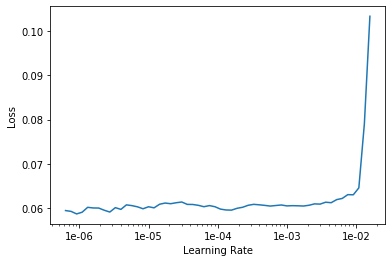

In [18]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(20,max_lr=slice(1e-03, lr/5))

epoch,train_loss,valid_loss,time
0,0.060828,0.100549,01:42
1,0.059070,0.108706,00:18
2,0.057594,0.101515,00:18
3,0.057736,0.080386,00:18
4,0.060157,0.101347,00:18
5,0.059096,0.087002,00:19
6,0.058993,0.112082,00:19
7,0.059206,0.084340,00:19
8,0.058648,0.103421,00:18
9,0.059110,0.087601,00:19


In [0]:
learn.save("stage-3-res34-size490x360-frozen")

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,0.047431,#na#,00:14
1,0.045450,#na#,00:13
2,0.045718,#na#,00:14
3,0.046169,#na#,00:14
4,0.047336,#na#,00:13
5,0.049640,#na#,00:14
6,0.171576,#na#,00:14


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


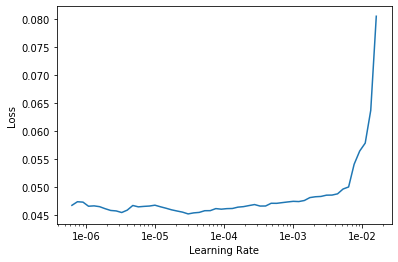

In [23]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(20,max_lr=slice(1e-03,lr/5))

epoch,train_loss,valid_loss,time
0,0.047745,0.097521,00:20
1,0.047209,0.083720,00:20
2,0.047454,0.099454,00:20
3,0.047035,0.081477,00:20
4,0.048520,3.095591,00:20
5,0.050291,0.630823,00:20
6,0.053030,0.248108,00:20
7,0.056363,0.152797,00:20
8,0.057318,0.397798,00:20
9,0.058672,0.096929,00:20


In [0]:
learn.save('stage-3-res34-size490x360-unfreezed')

#Exporting the model

In [10]:
learn.load('stage-3-res34-size490x360-unfreezed')

Learner(data=ImageDataBunch;

Train: LabelList (649 items)
x: PointsItemList
Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360)
y: PointsLabelList
ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490)
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data;

Valid: LabelList (412 items)
x: PointsItemList
Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360),Image (3, 490, 360)
y: PointsLabelList
ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490)
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    

In [0]:
learn.data = data

In [0]:
learn.export()

PosixPath('/content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data')